In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the acs dataset 
carbon_emissions = pd.read_excel('flight.xls', sep=',',header=0, skiprows= [0, 1, 2, 3, 4])
carbon_emissions.head()

#print(carbon_emissions.columns)



REPORTING YEAR                             FACILITY NAME  GHGRP ID  \
0            2016  #540 BONANZA CREEK ENERGY - DENVER BASIN   1000355   
1            2016            121 REGIONAL DISPOSAL FACILITY   1004377   
2            2016                         15-18565/15-18662   1010040   
3            2016                                  15-19015   1010085   
4            2016          17Z Gas Plant - Chevron USA Inc.   1012147   

              REPORTED ADDRESS   LATITUDE   LONGITUDE   CITY NAME  \
0  410 17th Street, Suite 1500  39.744310 -104.988580      Denver   
1     3820 SAM RAYBURN HIGHWAY  33.298570  -96.535860     MELISSA   
2               4200 S. Hwy 15  37.219099  -83.156046      Hazard   
3            1845 S. KY HWY 15  37.236617  -83.181260      Hazard   
4             22845 Highway 33  35.299879 -119.742604  McKittrick   

     COUNTY NAME STATE  ZIP CODE                             PARENT COMPANIES  \
0  DENVER COUNTY    CO   80202.0              BONANZA CREEK ENERGY INC (100%)   
1  COLLIN COUNTY    TX   75454.0  NORTH TEXAS MUNICIPAL WATER DISTRICT (100%)   
2   PERRY COUNTY    KY   40701.0                     CAMBRIAN COAL LLC (100%)   
3          PERRY    KY   41701.0                     CAMBRIAN COAL LLC (100%)   
4            NaN    CA   93251.0                          CHEVRON CORP (100%)   

   GHG QUANTITY (METRIC TONS CO2e) SUBPARTS  
0                           261383        W  
1                           221015       HH  
2                           141440       FF  
3                            35907       FF  
4                            10208   C,NN,W

In [56]:
carbon_clean = carbon_emissions.iloc[:, 4:12]
carbon_clean.head()

LATITUDE   LONGITUDE   CITY NAME    COUNTY NAME STATE  ZIP CODE  \
0  39.744310 -104.988580      Denver  DENVER COUNTY    CO   80202.0   
1  33.298570  -96.535860     MELISSA  COLLIN COUNTY    TX   75454.0   
2  37.219099  -83.156046      Hazard   PERRY COUNTY    KY   40701.0   
3  37.236617  -83.181260      Hazard          PERRY    KY   41701.0   
4  35.299879 -119.742604  McKittrick            NaN    CA   93251.0   

                              PARENT COMPANIES  \
0              BONANZA CREEK ENERGY INC (100%)   
1  NORTH TEXAS MUNICIPAL WATER DISTRICT (100%)   
2                     CAMBRIAN COAL LLC (100%)   
3                     CAMBRIAN COAL LLC (100%)   
4                          CHEVRON CORP (100%)   

   GHG QUANTITY (METRIC TONS CO2e)  
0                           261383  
1                           221015  
2                           141440  
3                            35907  
4                            10208

In [57]:
carbon_clean = carbon_clean.drop(carbon_clean.columns[[2,3,4,5,6]], axis=1) 
carbon_clean.head()

LATITUDE   LONGITUDE  GHG QUANTITY (METRIC TONS CO2e)
0  39.744310 -104.988580                           261383
1  33.298570  -96.535860                           221015
2  37.219099  -83.156046                           141440
3  37.236617  -83.181260                            35907
4  35.299879 -119.742604                            10208

In [58]:
carbon_clean = carbon_clean.sort_values(['GHG QUANTITY (METRIC TONS CO2e)'], ascending=False)
carbon_clean.head()


LATITUDE  LONGITUDE  GHG QUANTITY (METRIC TONS CO2e)
4387   33.6319   -87.0597                         19733139
7485   33.0583   -83.8072                         17656989
3597   38.3722   -87.7661                         15450755
1177   34.1256   -84.9192                         15422888
2108   45.8831  -106.6140                         14390436

In [59]:
carbon_lat_lon = carbon_clean.drop(carbon_clean.columns[[2]], axis=1)
carbon_lat_lon.head()

LATITUDE  LONGITUDE
4387   33.6319   -87.0597
7485   33.0583   -83.8072
3597   38.3722   -87.7661
1177   34.1256   -84.9192
2108   45.8831  -106.6140

In [60]:
#to find out number of clusters: we can have about 30
carbon_lat_lon.convert_objects(convert_numeric=True).dtypes

C:\Users\yajue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


LATITUDE     float64
LONGITUDE    float64
dtype: object

In [62]:
carbon_lat_lon.to_csv('carbon_floats.csv')

In [98]:
fName = ('carbon_floats.csv')
fp = open(fName)
X = np.loadtxt(fp, dtype='float', delimiter=',')
fp.close()

In [99]:
from scipy.cluster.vq import kmeans2,vq,whiten
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [100]:
K = range(1,100)

  # scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]  

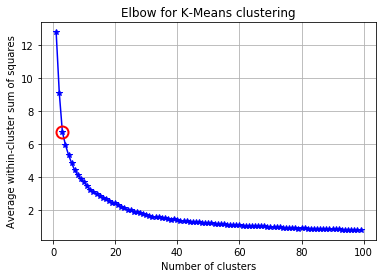

In [101]:
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  

In [130]:
from sklearn.cluster import k_means

for_k = pd.read_csv('carbon_floats.csv', sep=',',header=0, low_memory = False)
matrix = for_k.as_matrix()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30).fit(for_k)
clusters = kmeans.cluster_centers_

np.savetxt("centroid.csv", clusters, delimiter=",")


In [33]:
centroids = pd.read_csv('centroid.csv')
centroid_lst = []
for row in centroids.iterrows():
    centroid_lst.append({'lat': float(row[1]['lat']), 'lon': float(row[1]['long'])})

In [35]:
len(centroid_lst)

30